In [22]:
# Christian Zuniga
# January 2019

import numpy as np
from scipy import signal
from scipy import interpolate
from matplotlib import pyplot as plt
%matplotlib inline


# Laplace's Equation

Laplace equation specifies electric potential in a region where the fields are in steady-state and
zero charge distribution (special case of Poisson's equation)

\begin{align}
\nabla^2 \phi(x,y,y) =0
\end{align}

Laplace's equation can be solved by discretizing on a grid using finite differences for the derivatives and solved with iterative methods. For example, in two dimensions it can be written as an update equation. Making steps in x and y the same, the update equation is [1]:

\begin{align}
\ \phi_n[i,j] = 0.25[\phi_{n-1}[i-1,j] + \phi_{n-1}[i+1,j]+\phi{n-1}[i,j-1] + \phi_{n-1}[i,j+1]]
\end{align}

This equation can be written in matrix form as the result of a convolution of the previous potential with a kernel H

\begin{align}
\ \boldsymbol{\Phi_n} = \boldsymbol{\Phi_{n-1}} \circledast \boldsymbol{H}
\end{align}

H is a kernel given by:

\begin{align}
  H =
  \begin{bmatrix}
  0 & 0.25 & 0 \\
  0.25 & 0 & 0.25 \\
  0 & 0.25 & 0 \\
  \end{bmatrix}
\end{align}

The equation can then be solved with Numpy using convolution, taking care to maintain the boundary conditions.

# Example 1 (pg 140 in Ref 1)

Two capacitor plates are held at potential V = = and V = -1. They are sorrounded by a square boundary with potential held at V=0. 

In [23]:
# test example from Figure 5.6 in Computational Physics Book
N = 64             # number of grid points/ dimension
# initialize potential to be 0 except at capacitor plates 

potential = np.zeros((N,N))
potential[:,0] = 0             # allows changing BC for other problems
potential[:,N-1] = 0
potential[0,:] = 0
potential[N-1,:] = 0
xM = N/2
yM = N/2
dx = N/8
dy = N/8
yL = yM-dy
yU = yM+dy
potential[xM-dx,yL:yU] = 1     # potential for 2 capacitor plates
potential[xM+dx,yL:yU] = -1
print(potential)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [24]:
# make convolution kernel
H2D = np.zeros((3,3))
H2D[0,:] = [0.0,1.0,0.0]
H2D[1,:] = [1.0,0.0,1.0]
H2D[2,:] = H2D[0,:]
H2D = (1/4.0)*H2D
print(H2D)
print(H2D.shape)

[[ 0.    0.25  0.  ]
 [ 0.25  0.    0.25]
 [ 0.    0.25  0.  ]]
(3, 3)


In [25]:
numIter = 1000
for i in range(numIter):
    grid = signal.convolve2d(potential,H2D,boundary='symm',mode='same')
    potential[1:N-1,1:N-1] = grid[1:N-1,1:N-1] # updates potential
    #enforce Boundary conditions
    potential[:,0] = 0
    potential[:,N-1] = 0
    potential[0,:] = 0
    potential[N-1,:] = 0
    potential[xM-dx,yL:yU] = 1
    potential[xM+dx,yL:yU] = -1
    

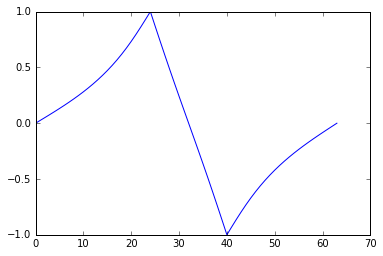

In [28]:
# check potential at a cutline in the middle of the square
plt.plot(potential[:,N/2])
plt.show()
# Potential is 0 at the ends. It reaches 1 at one capacitor plate and -1 at the other as expected.

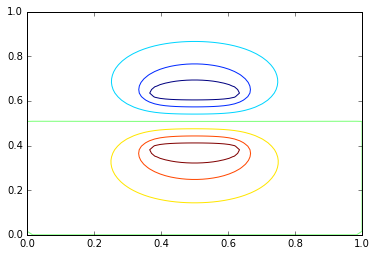

In [29]:
# Plot contours of potential 
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,potential)

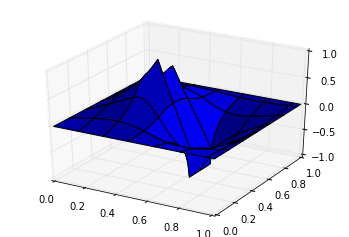

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y,X,potential,shade=True)


# References
[1] Giordano and Nakanishi, Computational Physics, Second Edition 2006